# Hannah Ludbrook

# Research question/interests
# Analysis Question 1:
## Why is there such a variation in the way data is collected for guardianship filings in the United States?

### Look into why we only have this information for some states and why some states don't separate their adult and child case filings

## The dataset
A dataset describing the adult guardianship filings in US courts

## Upload Data, clean it and get it to a useable state that will best suit my analysis question

In [95]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns#Understanding my variables 

%matplotlib inline

df = pd.read_csv('filing_counts.csv')

# set identifier "case_type" as string
df["case_type"] = df["case_type"].astype("str")

#Remove columns that I dont need
DeleteList=['for_total', 'case_action', 'year']
df=df.drop(DeleteList, axis=1)

#Drop Duplicates
df.drop_duplicates(inplace=True)


## Change the type of data for the columns I will be utilizing

In [3]:
# set categorial data
df["case_type"] = df ["case_type"].astype("category")
df["age_group"] = df ["age_group"].astype("category")
df["state"] = df ["state"].astype("category")


## Display different statistics and graphs to get a better understanding of my data

Preview of data:


,state,case_type,age_group,count
0,Alaska,G+C+Joint,Adults+Minors,1171
1,Alaska,G+C+Joint,Adults+Minors,1084
2,Alaska,G+C+Joint,Adults+Minors,1227



To check: 
 (1) Total number of entries 
 (2) Column types 
 (3) Any null values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 364 entries, 0 to 379
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   state      364 non-null    category
 1   case_type  364 non-null    category
 2   age_group  364 non-null    category
 3   count      364 non-null    int64   
dtypes: category(3), int64(1)
memory usage: 16.6 KB
None

No duplicated entries found

To check: 
Unique count of non-numeric data

state        37
case_type     4
age_group     4
dtype: int64
Top 5 unique values of state
            state  Count
0      New Mexico     34
1        Colorado     30
2  North Carolina     29
3           Idaho     16
4        Michigan     16
 
Top 5 unique values of case_type
              case_type  Count
0             G+C+Joint    130
1     Guardianship ONLY    102
2  Conservatorship ONLY     78
3        Joint G/C ONLY     54
 
Top

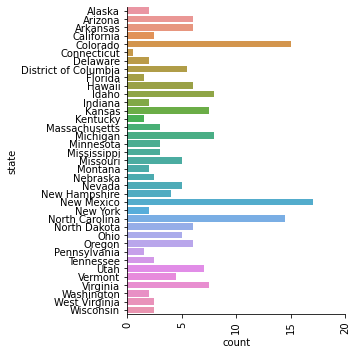

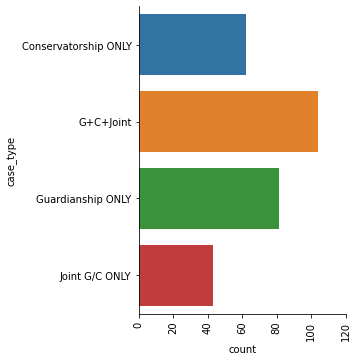

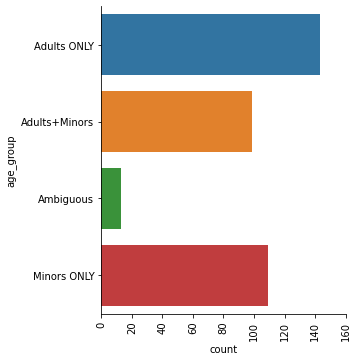

In [66]:
# Display data in initial different graphs and figures to get a better understanding of the data
eda(df)

## Create more figures to analyze my chosen columns to answer my research question

This graph shows the distribution of different cases for each seperate age group category. This doesnt really show an accurate repersentation of the actual amount of case types for each age group because of how differently records are held in each state but does help demonstrate much variation there is in record holding for both age groups and case types


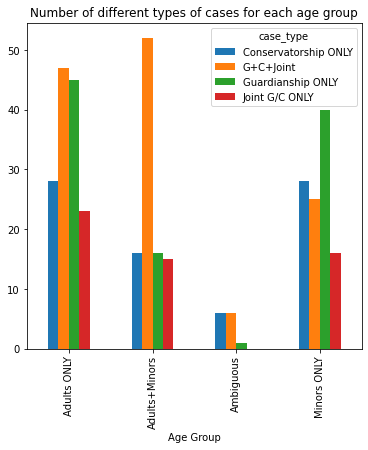

In [110]:
#Generate bar plot to show age group and case type together
CrosstabResult=pd.crosstab(index=df["age_group"], columns=df["case_type"])
CrosstabResult.plot.bar(figsize=(6,6))
plt.title("Number of different types of cases for each age group")
plt.xlabel("Age Group")
print("This graph shows the distribution of different cases for each seperate age group category. This doesnt really show an accurate repersentation of the actual amount of case types for each age group because of how differently records are held in each state but does help demonstrate much variation there is in record holding for both age groups and case types")


This scatterplot shows the distribution of how cases are recorded by age type in each state, there is a lot of discrepancies on how cases are recorded. Some states are all over the place and record cases in all 4 different age groups categories, some just record Adults and Minors together and some do a better job at splitting the age groups up based on the cases. I would like to explore this information more in each state to see the discrepencies closer up.


Text(0, 0.5, 'State')

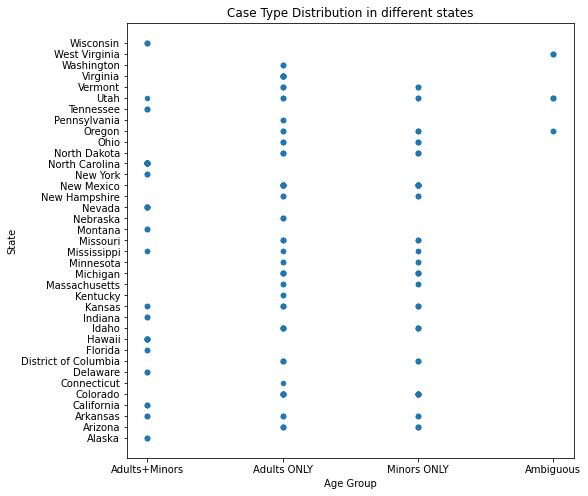

In [112]:
 # generate scatterplot
print("This scatterplot shows the distribution of how cases are recorded by age type in each state, there is a lot of discrepancies on how cases are recorded. Some states are all over the place and record cases in all 4 different age groups categories, some just record Adults and Minors together and some do a better job at splitting the age groups up based on the cases. I would like to explore this information more in each state to see the discrepencies closer up.")
df.plot(kind="scatter", x="age_group", y="state", figsize=(8,8))
#add title 
plt.title("Case Type Distribution in different states")
plt.xlabel("Age Group")
plt.ylabel("State")

In the graphs below I was able to split the information about how cases are recorded in the different age groups categories for each state. This allowed me to observe each state seperatley and draw conclusions on how different states record different cases. Most states choose to record by either completely splitting up the Minor and Adult cases or keeping them all together in the Minors and Adults column or the ambiguous column. A few states have numbers in all categories indicating that they may hold their cases differently for guardianship and conservatorship cases. These graphs show us how differently states file their cases and cconfirm my hypothesis that there is really no standardized way of recording cases across the United States


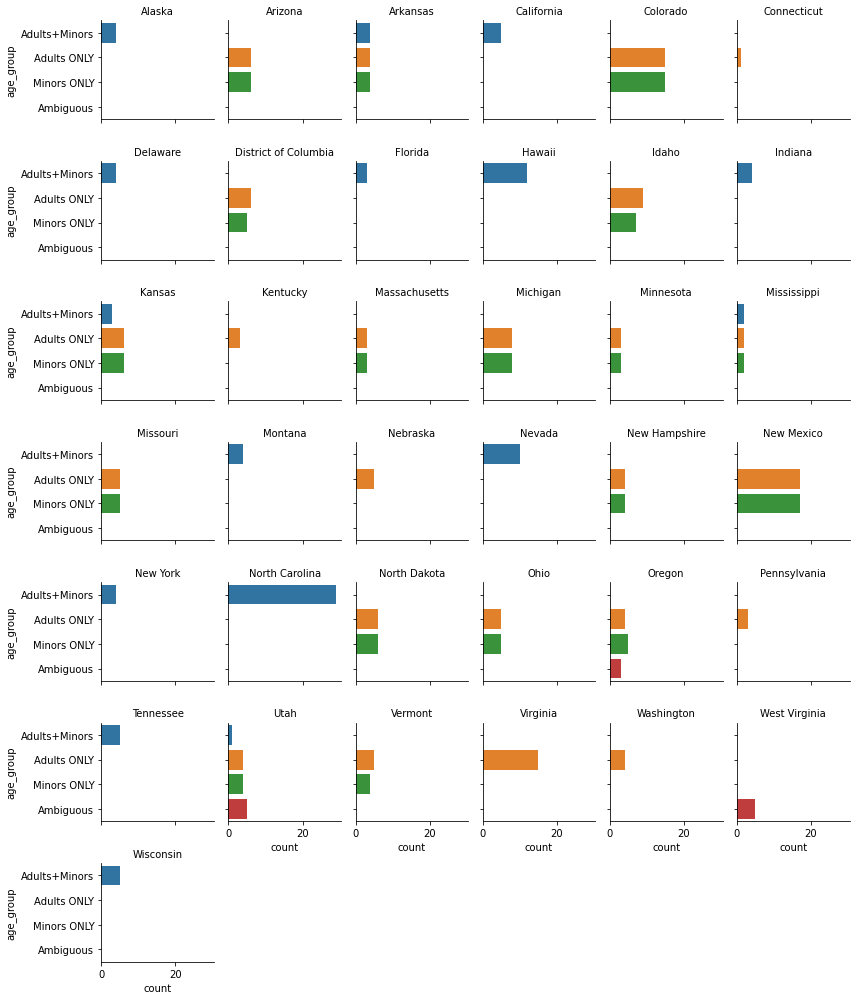

In [107]:
 #Create Graphs for each state
boxplot = sns.catplot(y="age_group", col="state", col_wrap=6, 
        data=df[df.age_group.notnull()], 
        kind="count", height=2, aspect=1)

#Resize x labels
for ax in boxplot.axes:
    plt.setp(ax.get_xticklabels(), visible=True)
#remove axis title
boxplot.set_titles(template="{col_name}")
print("In the graphs below I was able to split the information about how cases are recorded in the different age groups categories for each state. This allowed me to observe each state seperatley and draw conclusions on how different states record different cases. Most states choose to record by either completely splitting up the Minor and Adult cases or keeping them all together in the Minors and Adults column or the ambiguous column. A few states have numbers in all categories indicating that they may hold their cases differently for guardianship and conservatorship cases. These graphs show us how differently states file their cases and cconfirm my hypothesis that there is really no standardized way of recording cases across the United States")


## Analyze the reasoning for the findings from my figures

The information we gathered was courtesy of buzzfeed who utilized court documents, mental health filings and financial records, guardianship cases and gathered data from public records to create their dataset and article about guardianship in USA. As of now there is no federal standard for tracking adult guardianship cases and there for the state systems are very scattered and not sorted in the same way. This makes drawing conclusions about the guardianship system in the country overall very difficult. Buzzfeed was able to compile exstensive data which I was able to further manipulate in order to explore the variation of the data collection in different states. 

My data figures proved that the variation in record keeping did exist so then I went and looked into some more research in this topic to see why this was the case and the impact that it had. Based on the articles I read I discovered that many guardianship cases taken to court are included in a more genaric case type group and there for cannot be distinguished as adult cases and child cases. This variation of data makes it very difficult to understand the trends of guardianship. Although some research suggests that the number of adults under guardianship is growing there is no way to know for sure because of the discrepencies in record keeping. This is a huge issue because there are many cases of negelect and mistreatment of adults under guardianship but we have no way of tracking this if we dont have accurate record keeping. 

The variation in state data is the result of not having a standardized system of adult guardianship cases that enter and exit the courts. As states hold their records differently it is extremely difficult to draw conclusions on the data. This leaves room for abuse and neglect to those under guardianship with very little consequences to the guardians.


## Method Chaining

In [29]:
import pandas as pd
import numpy as np


df = (
    pd.read_csv('filing_counts.csv')   
    .drop('for_total',axis=1)
    .drop('case_action',axis=1)
    .drop('year', axis=1)
    .assign(state_agegroup=lambda x: x['age_group']+x['state'])
)





## Code for EDA above

In [65]:
def top5(df):
    """Given dataframe, generate top 5 unique values for non-numeric data"""
    columns = df.select_dtypes(include=['object', 'category']).columns
    for col in columns:
        print("Top 5 unique values of " + col)
        print(df[col].value_counts().reset_index().rename(columns={"index": col, col: "Count"})[
              :min(5, len(df[col].value_counts()))])
        print(" ")

    
def categorical_eda(df, hue=None):
    """Given dataframe, generate EDA of categorical data"""
    print("\nTo check: \nUnique count of non-numeric data\n")
    print(df.select_dtypes(include=['object', 'category']).nunique())
    top5(df)
    # Plot count distribution of categorical data
    print("These first 3 graphs show the total count of cases in each state, how these cases are split into case type and then how the count is split into age group. This is a good start for my analysis because it shows the simple distribution of categorial data that I want to take a deeper dive into. Moving forward I am going to focus on age group but these plots give me a better understanding of the categorial data as a whole.")
    for col in df.select_dtypes(include='category').columns:
        fig = sns.catplot(y=col, kind="count", data=df, hue=hue)
        fig.set_xticklabels(rotation=90)
        plt.show()
    
def eda(df):
    """Given dataframe, generate exploratory data analysis"""
    # check that input is pandas dataframe
    if type(df) != pd.core.frame.DataFrame:
        raise TypeError("Only pandas dataframe is allowed as input")
        
    # replace field that's entirely space (or empty) with NaN
    df = df.replace(r'^\s*$', np.nan, regex=True)

    print("Preview of data:")
    display(df.head(3))

    print("\nTo check: \n (1) Total number of entries \n (2) Column types \n (3) Any null values\n")
    print(df.info())

    # generate preview of entries with null values
    if df.isnull().any(axis=None):
        print("\nPreview of data with null values:")
        display(df[df.isnull().any(axis=1)].head(3))
        missingno.matrix(df)
        plt.show()

    # generate count statistics of duplicate entries
    if len(df[df.duplicated()]) > 0:
        print("\n***Number of duplicated entries: ", len(df[df.duplicated()]))
        display(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)).head())
    else:
        print("\nNo duplicated entries found")
    
    #EDA of categorical data
    categorical_eda(df)

   

  



    
   